In [1]:
import pandas as pd 
import numpy as np 
from functools import reduce
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm,preprocessing 
from sklearn.metrics import classification_report
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np

from sklearn.preprocessing import MinMaxScaler


## Notice that the returns column uses opening prices as opposed to closing prices, to avoid look-ahead bias.

In [12]:
df0 = pd.read_csv("S&P.csv", thousands=',')
df0 = df0.drop(columns=['Low', 'High', 'Vol.', 'Open', 'Close', 'Change %'], errors='ignore')
df0.rename(columns={'Price': 'S&P500'}, inplace=True)
#df0.head()

df1 = pd.read_csv("BDRY.csv", thousands=',')
df1 = df1.drop(columns=['Low', 'High', 'Vol.', 'Open', 'Close', 'Change %'], errors='ignore')
df1.rename(columns={'Price': 'BDRY'}, inplace=True)
#df1.head()

df2 = pd.read_csv("BRENT_FUTURES.csv", thousands=',')
df2 = df2.drop(columns=['Low', 'High', 'Vol.', 'Open', 'Close', 'Change %'], errors='ignore')
df2.rename(columns={'Price': 'BRENT_FUTURES'}, inplace=True)
#df2.head()

#df3 = pd.read_csv("CAPESIZE.csv", thousands=',')
#df3= df3.drop(columns=['Low', 'High', 'Vol.', 'Open', 'Close', 'Change %'], errors='ignore')
#df3.rename(columns={'Price': 'CAPESIZE'}, inplace=True)
#df3.head()

df4 = pd.read_csv("CNY_USD.csv", thousands=',')
df4 = df4.drop(columns=['Low', 'High', 'Vol.', 'Open', 'Close', 'Change %'], errors='ignore')
df4.rename(columns={'Price': 'CNY_USD'}, inplace=True)
#df4.head()

df5 = pd.read_csv("EUR_USD.csv", thousands=',')
df5 = df5.drop(columns=['Low', 'High', 'Vol.', 'Open', 'Close', 'Change %'], errors='ignore')
df5.rename(columns={'Price': 'EUR_USD'}, inplace=True)
#df5.head()

df6 = pd.read_csv("GOGL.csv", thousands=',')
df6 = df6.drop(columns=['Low', 'High', 'Volume', 'Close', 'Adj Close', 'Change %'], errors='ignore')
df6.rename(columns={'Open': 'GOGL'}, inplace=True)
#df6.head()

In [13]:
dfs_date = [df0, df1, df2, df4, df5, df6]
for df in dfs_date:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Date'] = pd.to_datetime(df["Date"].dt.strftime('%Y/%m%/d%'))

df_numeric = [df0, df1, df6]
for df in df_numeric:
    df[df.columns[-1]] = pd.to_numeric(df[df.columns[-1]].replace(',', ''), errors='coerce')

In [14]:
dfs_merge = [df6, df1, df2, df4, df0, df5]
df = reduce(lambda x,y: pd.merge(x, y, on = "Date"), dfs_merge)
df.head()

Date       GOGL    BDRY  BRENT_FUTURES  CNY_USD   S&P500  EUR_USD
0 2012-07-05  41.799999  1138.0         100.70   0.1573  1367.58   1.2393
1 2012-07-06  42.250000  1157.0          98.19   0.1571  1354.68   1.2288
2 2012-07-09  44.200001  1162.0         100.32   0.1570  1352.46   1.2319
3 2012-07-10  43.299999  1160.0          97.97   0.1571  1341.47   1.2252
4 2012-07-11  42.500000  1146.0         100.23   0.1570  1341.45   1.2239

In [ ]:
## Saving new dataframe to csv, hence not needing to run all datawrangling operations every time
df.to_csv(r'C:\Users\larsm\OneDrive\NHH\Master\Høst20\Masteroppgave\features.csv', index=False)

In [8]:
#Forskjellen fra min og SVM-modellen er at jeg også baserer meg på om forrige verdi er buy/hold eller sell, de baserer seg kun på om returnen er positiv eller negativ. 
df['Label'] = 0
df['Returns'] = (df['GOGL']-df['GOGL'])/df['GOGL']
for i in range(1, len(df)):
    if (df['GOGL'][i]-df['GOGL'][i-1])/df['GOGL'][i-1] > 0.01 and df['Label'][i-1]!=1:
        df['Label'][i] = 1
        df['Returns'][i] = (df['GOGL'][i]-df['GOGL'][i-1])/df['GOGL'][i-1]
    elif (df['GOGL'][i]-df['GOGL'][i-1])/df['GOGL'][i-1] < -0.01 and df['Label'][i-1]!=-1:
        df['Label'][i] = -1
        df['Returns'][i] = (df['GOGL'][i]-df['GOGL'][i-1])/df['GOGL'][i-1]
    else:
        df['Label'][i] = 0
        df['Returns'][i] = (df['GOGL'][i]-df['GOGL'][i-1])/df['GOGL'][i-1]
df = df.set_index('Date')
df.head()

GOGL    BDRY  BRENT_FUTURES  CAPESIZE  CNY_USD   S&P500  \
Date                                                                       
2012-07-05  41.799999  1138.0         100.70    1455.0   0.1573  1367.58   
2012-07-06  42.250000  1157.0          98.19    1493.0   0.1571  1354.68   
2012-07-09  44.200001  1162.0         100.32    1501.0   0.1570  1352.46   
2012-07-10  43.299999  1160.0          97.97    1484.0   0.1571  1341.47   
2012-07-11  42.500000  1146.0         100.23    1428.0   0.1570  1341.45   

            EUR_USD  Label   Returns  Signal  
Date                                          
2012-07-05   1.2393      0  0.000000       0  
2012-07-06   1.2288      1  0.010766       1  
2012-07-09   1.2319      0  0.046154       1  
2012-07-10   1.2252     -1 -0.020362       0  
2012-07-11   1.2239      0 -0.018476       0

In [ ]:
# Lager her en verdi for returns om det er positivt eller negativ. Kaller den signals, dette for å ligne mer på modellen .

In [9]:
df['Signal'] = 0
for i in range(len(df)):
    if df['Returns'][i] > 0:
        df['Signal'][i] = 1
    else:
        df['Signal'][i] = 0
df.head()

GOGL    BDRY  BRENT_FUTURES  CAPESIZE  CNY_USD   S&P500  \
Date                                                                       
2012-07-05  41.799999  1138.0         100.70    1455.0   0.1573  1367.58   
2012-07-06  42.250000  1157.0          98.19    1493.0   0.1571  1354.68   
2012-07-09  44.200001  1162.0         100.32    1501.0   0.1570  1352.46   
2012-07-10  43.299999  1160.0          97.97    1484.0   0.1571  1341.47   
2012-07-11  42.500000  1146.0         100.23    1428.0   0.1570  1341.45   

            EUR_USD  Label   Returns  Signal  
Date                                          
2012-07-05   1.2393      0  0.000000       0  
2012-07-06   1.2288      1  0.010766       1  
2012-07-09   1.2319      0  0.046154       1  
2012-07-10   1.2252     -1 -0.020362       0  
2012-07-11   1.2239      0 -0.018476       0

## Start of model

In [22]:
#Dette funket
max_abs_scaler = preprocessing.MaxAbsScaler()
Model_Dict = {}
df.dropna(inplace=True)
X = np.array(df.drop(['Label', 'Returns', 'Signal'],1))
X = max_abs_scaler.fit_transform(X)
Y = np.array(df['Signal'])
   
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
    

In [15]:

Model_Dict['X Train'] = X_train
Model_Dict['X Test'] = X_test
Model_Dict['Y Train'] = y_train
Model_Dict['Y Test'] = y_test
    

In [19]:
model = svm.SVC(kernel='rbf',decision_function_shape='ovo')

    
model.fit(Model_Dict['X Train'], Model_Dict['Y Train'])
y_pred = model.predict(Model_Dict['X Test'])
    
Model_Dict['Y Prediction'] = y_pred


In [20]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [21]:
print("Accuracy:",metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction']))
Model_Dict['Accuracy'] = metrics.accuracy_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'])

print("Precision:",metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=str(1),average="macro"))
Model_Dict['Precision'] = metrics.precision_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=str(1),average="macro")

print("Recall:",metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=str(1),average="macro"))
Model_Dict['Recall'] = metrics.recall_score(Model_Dict['Y Test'], Model_Dict['Y Prediction'],pos_label=str(1),average="macro")


Accuracy: 0.4726930320150659
Precision: 0.15756434400502198
Recall: 0.3333333333333333


## Portifolio performane is gaugded by the use of Sharpe ratio


In [51]:
prediction_length = len(Model_Dict['Y Prediction'])
    
#df['SVM Signal'] = 0
df['SVM Returns'] = 0
df['Total Strat Returns'] = 0
df['Market Returns'] = 0
    
#Signal_Column = df.columns.get_loc('SVM Signal')
Signal_Column = df.columns.get_loc('Signal')
Strat_Column = df.columns.get_loc('SVM Returns')
Return_Column = df.columns.get_loc('Total Strat Returns')
Market_Column = df.columns.get_loc('Market Returns')
df.iloc[-prediction_length:,Signal_Column] = list(map(int,Model_Dict['Y Prediction']))

## Må få til at SVM returns baserer seg på de predikerte verdiene fra Model_dict, nå får den perfekt return fordi den bare baserer seg på min Signals, ikke det predikerte.

In [52]:
#for i in range(1, len(df)):
    #df['SVM Returns'][i] = df['SVM Signal'][i] * df['Returns'][i-1]
df['SVM Returns'] = df['Signal'] * df['Returns']
    
#df[-prediction_length:,Return_Column] = np.nancumsum(df['SVM Returns'][-prediction_length:])
#df[-prediction_length:,Market_Column] = np.nancumsum(df['Returns'][-prediction_length:])
df['Total Strat Returns'] = np.nancumsum(df['SVM Returns'])
df['Market Returns'] = np.nancumsum(df['Returns'])
    
Model_Dict['Sharpe_Ratio'] = (df['Total Strat Returns'][i] - df['Market Returns'][i-1])/ \
        np.nanstd(df['Total Strat Returns'][-prediction_length:])

In [53]:
df.head()

GOGL    BDRY  BRENT_FUTURES  CAPESIZE  CNY_USD   S&P500  \
Date                                                                       
2012-07-05  41.799999  1138.0         100.70    1455.0   0.1573  1367.58   
2012-07-06  42.250000  1157.0          98.19    1493.0   0.1571  1354.68   
2012-07-09  44.200001  1162.0         100.32    1501.0   0.1570  1352.46   
2012-07-10  43.299999  1160.0          97.97    1484.0   0.1571  1341.47   
2012-07-11  42.500000  1146.0         100.23    1428.0   0.1570  1341.45   

            EUR_USD  Label   Returns  SVM Returns  Total Strat Returns  \
Date                                                                     
2012-07-05   1.2393      0  0.000000     0.000000             0.000000   
2012-07-06   1.2288      1  0.010766     0.010766             0.010766   
2012-07-09   1.2319      0  0.046154     0.046154             0.056919   
2012-07-10   1.2252     -1 -0.020362    -0.000000             0.056919   
2012-07-11   1.2239      0 -0.018476    -0.000000             0.056919   

            Market Returns  Signal  
Date                                
2012-07-05        0.000000       0  
2012-07-06        0.010766       1  
2012-07-09        0.056919       1  
2012-07-10        0.036557       0  
2012-07-11        0.018082       0

### Plotting

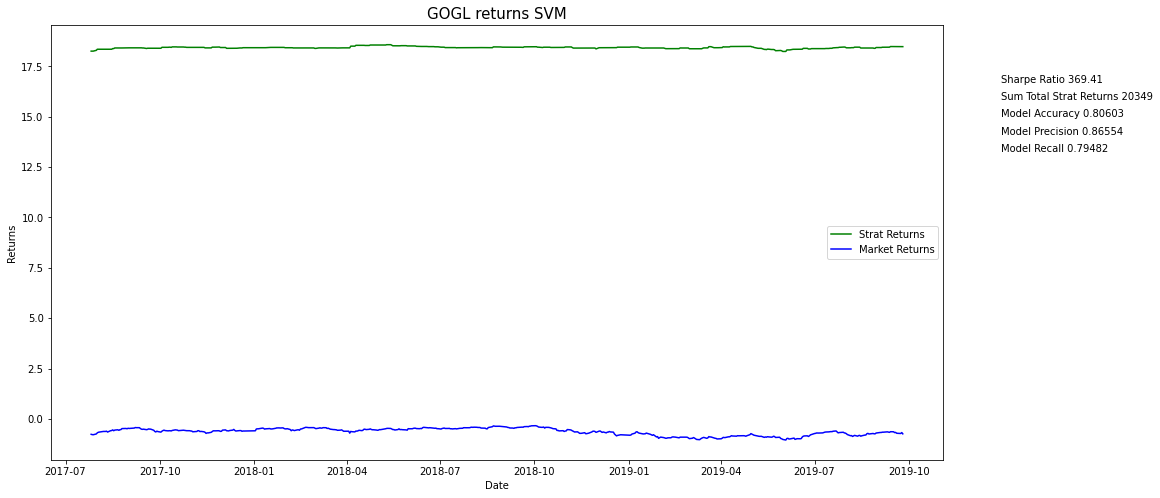

In [54]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(df[-prediction_length:].index.values,
        df['Total Strat Returns'][-prediction_length:].values, color='g', label="Strat Returns")  
ax.plot(df[-prediction_length:].index.values,
    df['Market Returns'][-prediction_length:].values, color='b', label="Market Returns")   

ax.set(xlabel= "Date",ylabel="Returns")
plt.title("GOGL returns SVM",fontsize=15)
#ax.xaxis.set_major_locator(AutoLocator())
    
plt.figtext(.95,0.78, s="Sharpe Ratio "+'{0:.5g}'.format(Model_Dict['Sharpe_Ratio']))
plt.figtext(.95,0.75, s="Sum Total Strat Returns "+'{0:.5g}'.format(df['Total Strat Returns'].sum()))
plt.figtext(.95,0.72,s="Model Accuracy " +'{0:.5g}'.format(Model_Dict['Accuracy']))
plt.figtext(.95,0.69,s="Model Precision " +'{0:.5g}'.format(Model_Dict['Precision']))
plt.figtext(.95,0.66,s="Model Recall " +'{0:.5g}'.format(Model_Dict['Recall']))
    
plt.legend(loc='best')
plt.show()